<a href="https://colab.research.google.com/github/umamaheshkona/Machine-learning/blob/main/univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

importing the libraries

In [ ]:

data=pd.read_csv('/content/Company_data.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


importing the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


isnull() method shows whether there is null values or not 

In [ ]:
data.shape

(200, 4)

In [ ]:
data.describe().loc['mean']

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         15.1305
Name: mean, dtype: float64

<Axes: >

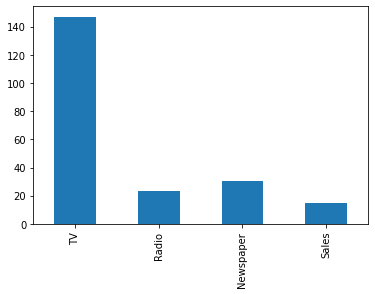

In [ ]:
data.describe().loc['mean'].plot.bar()

In [ ]:
cd=data.corr()

In [ ]:
cd.shape

(4, 4)

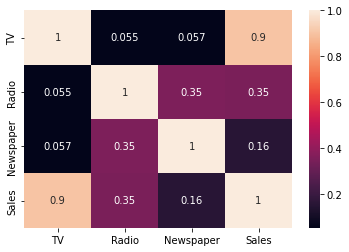

In [ ]:
sns.heatmap(cd,annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x=data.drop('Sales',axis=1).values
y=data['Sales'].values

In [ ]:
print(x)
print(y)

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

In [ ]:
x_tv=data['TV'].values
print(x_tv)

[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 199.8 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7
  53.5 261.3 239.3 102.7 131.1  69.   31.5 139.3 237.4 216.8 199.1 109.8
  26.8 129.4 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4
 213.5 193.2  76.3 110.7  88.3 109.8 134.3  28.6 217.7 250.9 107.4 163.3
 197.6 184.9 289.7 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4
  13.1 255.4 225.8 241.7 175.7 209.6  78.2  75.1 139.2  76.4 125.7  19.4
 141.3  18.8 224.  123.1 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2
   8.4 219.8  36.9  48.3  25.6 273.7  43.  184.9  73.4 193.7 220.5 104.6
  96.2 140.3 240.1 243.2  38.   44.7 280.7 121.  197.6 171.3 187.8   4.1
  93.9 149.8  11.7 131.7 172.5  85.7 188.4 163.5 11

In [ ]:
x_tv.shape,y.shape

((200,), (200,))

In [ ]:
type(x_tv),type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
x_tv=x_tv.reshape(-1,1)
y=y.reshape(-1,1)

In [ ]:
x_tv.shape,y.shape

((200, 1), (200, 1))

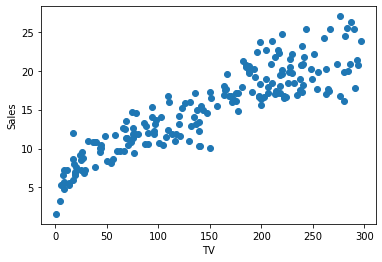

In [ ]:
plt.scatter(x_tv,y)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [ ]:
x=data.iloc[:,:1]
y=data.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
print(x)

        TV
0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
..     ...
195   38.2
196   94.2
197  177.0
198  283.6
199  232.1

[200 rows x 1 columns]


we can take different test_size and random states.If random states vary then we can observe change in the scatter plot of the data.

In [ ]:
reg=linear_model.LinearRegression()
reg.fit(x_tv,y)

LinearRegression()

In [ ]:
y_pred=reg.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


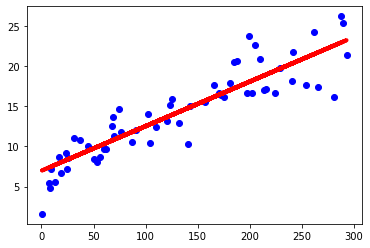

In [ ]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='red',linewidth=4)
plt.show()

In [ ]:
x_train.shape,x_test.shape
y_train.shape,y_test.shape

((140,), (60,))

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


print(f'MAE = {mean_absolute_error(y_test, y_pred)}')
print(f'MSE = {mean_squared_error(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R_2 = {r2_score(y_test, y_pred)}')

MAE = 1.854826452591508
MSE = 5.527684230698508
RMSE = 2.351102769063596
R_2 = 0.8164070206173365


Here,we observed that R_2score is nearer to 1 we can say that it is model is not so bad.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [ ]:
reg = Lasso(alpha = 0.1)
reg.fit(x_train, y_train)

Lasso(alpha=0.1)

In [ ]:
y_pred1=reg.predict(x_test)

In [ ]:
print(f'MAE = {mean_absolute_error(y_test, y_pred1)}')
print(f'MSE = {mean_squared_error(y_test, y_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred1))}')
print(f'R_2 = {r2_score(y_test, y_pred1)}')

MAE = 1.8640682195228326
MSE = 5.570088788623385
RMSE = 2.360103554639793
R_2 = 0.8149986226691329


In [ ]:
reg.score(x_test,y_test)

0.8149986226691329

lasso regression is a technique used for avoiding overfitting.It helps in 
feature selection

In [ ]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha = 0.1)
reg.fit(x_train, y_train)

Ridge(alpha=0.1)

In [ ]:
y_pred2=reg.predict(x_test)

In [ ]:
print(f'MAE = {mean_absolute_error(y_test, y_pred2)}')
print(f'MSE = {mean_squared_error(y_test, y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred2))}')
print(f'R_2 = {r2_score(y_test, y_pred2)}')

MAE = 1.8639439402601365
MSE = 5.569539407683224
RMSE = 2.3599871626098357
R_2 = 0.8150168694573738


Ridge Regression is a technique for avoiding overfitting of data.

In [ ]:
reg.score(x_test,y_test)

0.8150168694573738

if we change the alpha values in lasso and ridge then the values will change accordingly.